In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from collections import Counter

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.shape

(5570, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA (Exploratory Data Anlaysis)
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy into a website

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5570 non-null   object
 1   v2          5570 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [8]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [9]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns = {'v1' : 'Target', 'v2' : 'Email'}, inplace = True)
df.head(5)

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.head()  

,Target,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Ham is 0 and spam is 1

In [14]:
# Checking for missing values
df.isnull().sum()

Target    0
Email     0
dtype: int64

In [15]:
## Checkingf for duplicate values
df.duplicated().sum()

409

In [16]:
# removing duplicates
df = df.drop_duplicates(keep = 'first')

In [17]:
df.shape

(5161, 2)

## 2. EDA (Exploratory Data Analysis)

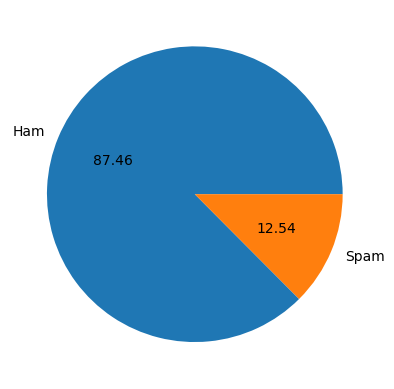

In [19]:
plt.pie(df['Target'].value_counts() / len(df), labels = ['Ham', 'Spam'], autopct = '%0.2f')
plt.show()

#### Data is imbalanced, with higher percentage of data in Ham and low percentage is Spam

In [21]:
import nltk # Natural Language Tool kit library
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Spegr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_character'] = df['Email'].apply(len)

In [23]:
df['num_words'] = df['Email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df['num_sentence'] = df['Email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,Target,Email,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,Target,num_character,num_words,num_sentence
count,5161.000000,5161.000000,5161.000000,5161.000000
mean,0.125363,78.832591,18.449138,1.964348
std,0.331162,58.154554,13.328082,1.448164
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,116.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
df[df['Target']==0].describe() # Ham data from the dataset

,Target,num_character,num_words,num_sentence
count,4514.0,4514.000000,4514.000000,4514.000000
mean,0.0,70.449712,17.128932,1.820558
std,0.0,56.360126,13.494736,1.383856
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [28]:
df[df['Target']==1].describe() # Spam data from the dataset

,Target,num_character,num_words,num_sentence
count,647.0,647.000000,647.000000,647.000000
mean,1.0,137.318393,27.659969,2.967543
std,0.0,30.096861,7.038065,1.490069
min,1.0,13.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


Text(0.5, 1.0, 'Distribution of Number of characters based on Ham and Spam')

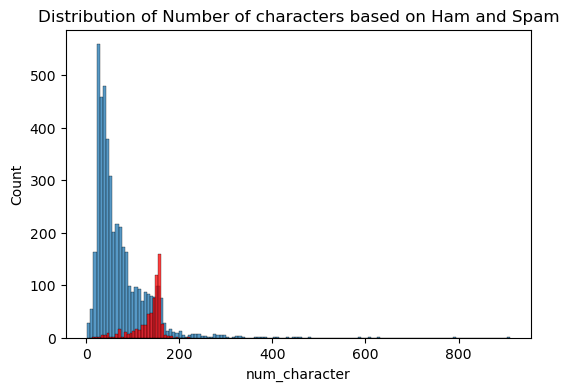

In [29]:
plt.figure(figsize = (6,4))
sns.histplot(df[df['Target']==0]['num_character']) # Ham
sns.histplot(df[df['Target']==1]['num_character'], color = 'red') # Spam
plt.title('Distribution of Number of characters based on Ham and Spam')

Text(0.5, 1.0, 'Distribution of Number of words based on Ham and Spam')

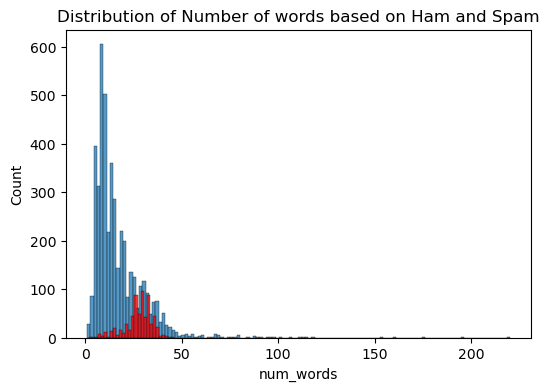

In [30]:
plt.figure(figsize = (6,4))
sns.histplot(df[df['Target']==0]['num_words']) # Ham
sns.histplot(df[df['Target']==1]['num_words'], color = 'red') # Soam
plt.title('Distribution of Number of words based on Ham and Spam')

Text(0.5, 1.0, 'Distribution of Number of sentences based on Ham and Spam')

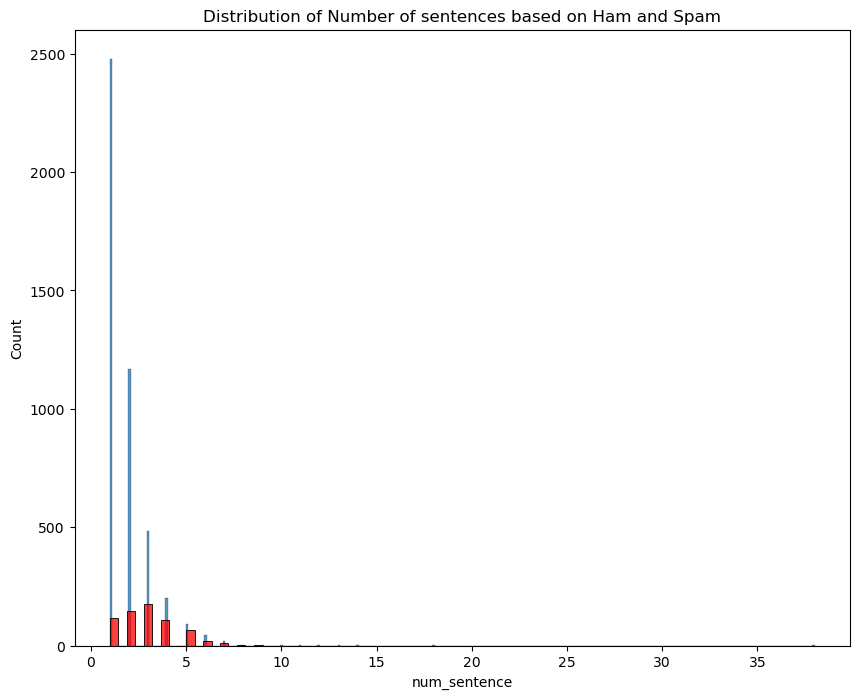

In [31]:
plt.figure(figsize = (10,8))
sns.histplot(df[df['Target']==0]['num_sentence']) # Ham
sns.histplot(df[df['Target']==1]['num_sentence'], color = 'red') # Spam
plt.title('Distribution of Number of sentences based on Ham and Spam')

In [32]:
df.describe()

,Target,num_character,num_words,num_sentence
count,5161.000000,5161.000000,5161.000000,5161.000000
mean,0.125363,78.832591,18.449138,1.964348
std,0.331162,58.154554,13.328082,1.448164
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,116.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


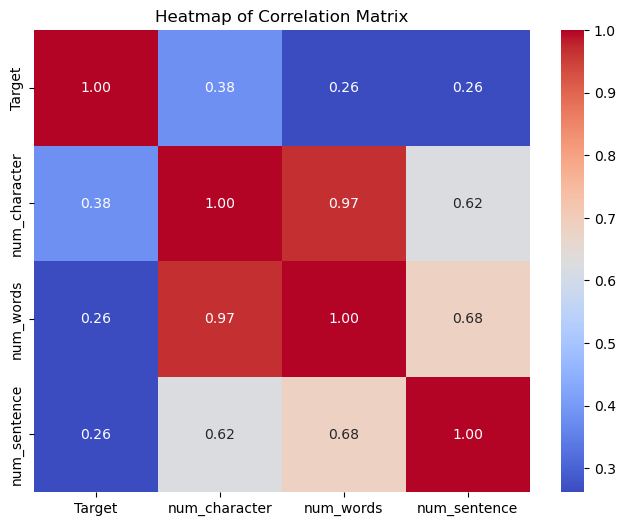

In [33]:
correlation_matrix = df.select_dtypes(exclude='object').corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlation Matrix")
plt.show()

<Figure size 500x500 with 0 Axes>

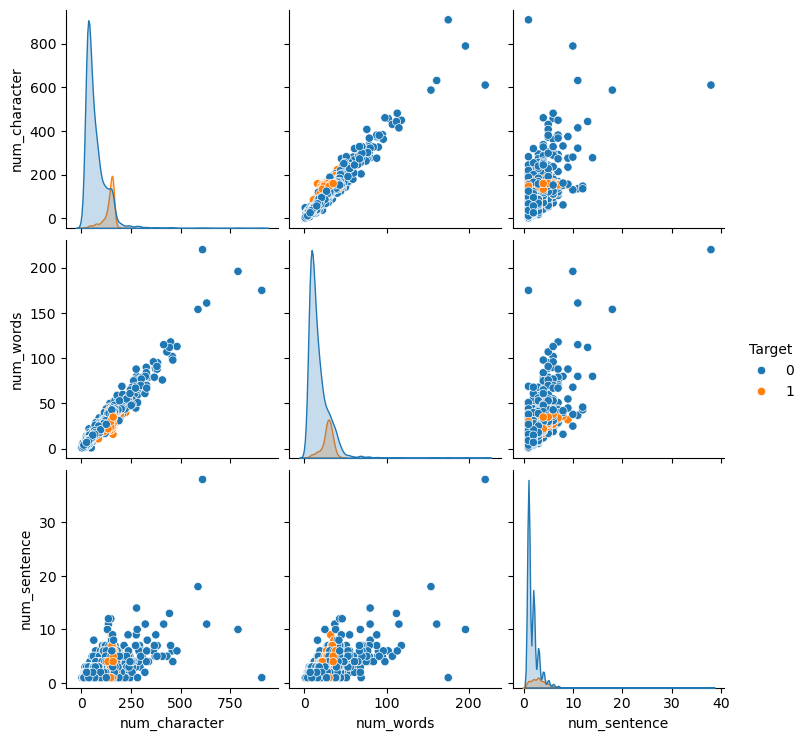

In [34]:
plt.figure(figsize=(5, 5))
sns.pairplot(df, hue = 'Target')

## 3. Data Preprocessing(Text Preprocessing)
* Lower Case
* Tokenization
* Removing Special Characters
* Removing stop words and punctuation
* stemming

In [36]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    
    
    return ' '.join(y)

In [37]:
df['transformed_text'] = df['Email'].apply(transform_text)

In [38]:
df.head()

,Target,Email,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 12, background_color = 'Black' )

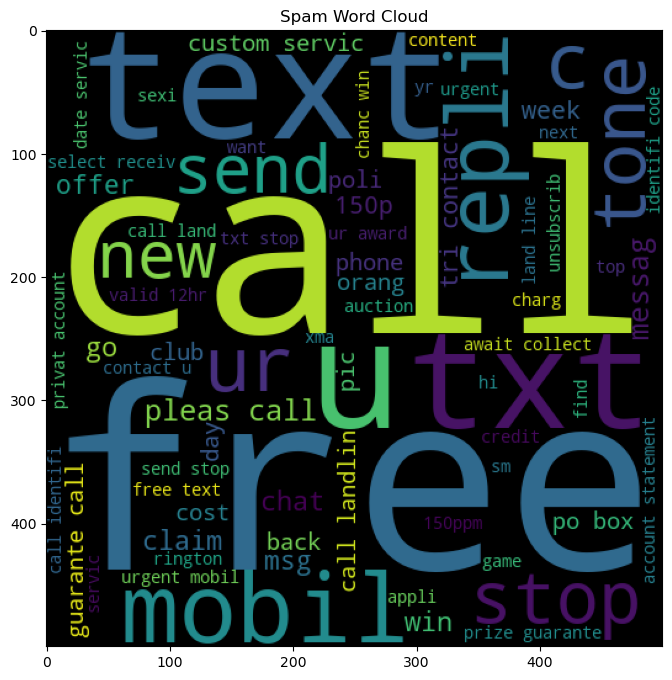

In [40]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize = (8,8))
plt.title('Spam Word Cloud')
plt.imshow(spam_wc)

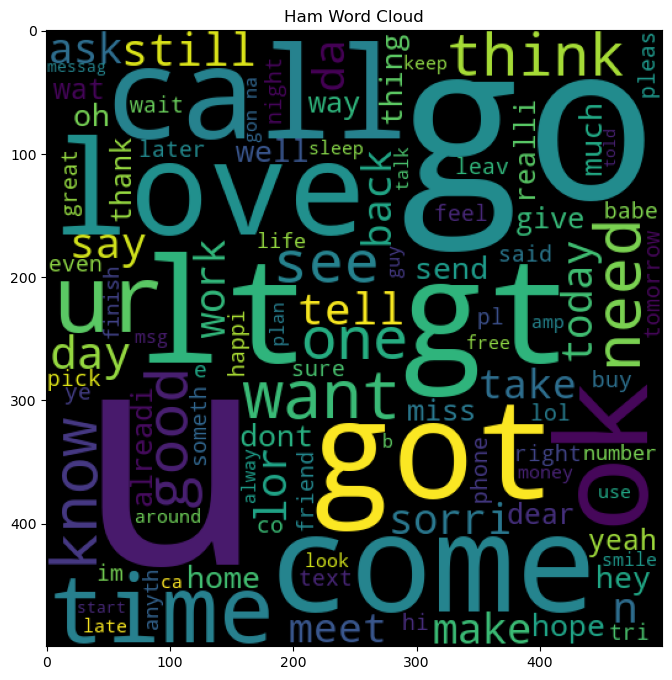

In [41]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize = (8,8))
plt.title('Ham Word Cloud')
plt.imshow(ham_wc)

In [42]:
spam_corpus = []
for message in df[df['Target']==1]['transformed_text'].tolist():
    for words in message.split():
        spam_corpus.append(words)

<Axes: ylabel='0'>

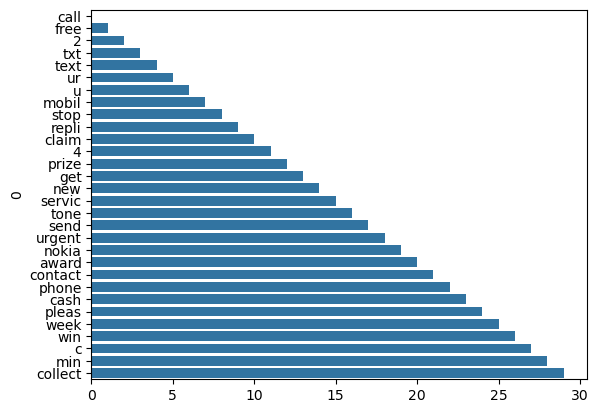

In [43]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

In [44]:
ham_corpus = []
for message in df[df['Target']==0]['transformed_text'].tolist():
    for words in message.split():
        ham_corpus.append(words)

<Axes: ylabel='0'>

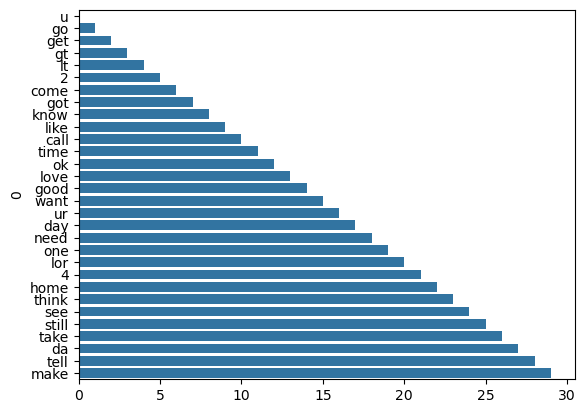

In [45]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

## 4. Building Machine Learning Models

In [47]:
# Text Vectorization
# Bag of words
# TFIDF vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 5000)

In [48]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [49]:
X.shape

(5161, 5000)

In [50]:
y = df['Target'].values

In [51]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8557599225556631
[[780 120]
 [ 29 104]]
0.4642857142857143


In [57]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9661181026137464
[[900   0]
 [ 35  98]]
1.0


In [58]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9757986447241046
[[900   0]
 [ 25 108]]
1.0


In [59]:
# TFIDF vectorization adn Multinomial Naive Bayes has done well until now

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [62]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [63]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [64]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9651500484027106
Precision -  0.9532710280373832
For  KN
Accuracy -  0.9012584704743466
Precision -  1.0
For  NB
Accuracy -  0.9661181026137464
Precision -  1.0
For  DT
Accuracy -  0.9390125847047435
Precision -  0.8571428571428571
For  LR
Accuracy -  0.9506292352371732
Precision -  0.9361702127659575
For  RF
Accuracy -  0.9709583736689255
Precision -  1.0


C:\Users\Spegr\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9641819941916747
Precision -  0.9444444444444444
For  BgC
Accuracy -  0.9651500484027106
Precision -  0.9145299145299145
For  ETC
Accuracy -  0.9757986447241046
Precision -  0.990909090909091
For  GBDT
Accuracy -  0.9564375605033882
Precision -  0.9680851063829787
For  xgb
Accuracy -  0.9709583736689255
Precision -  0.963963963963964


In [65]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [66]:
performance_df1 = performance_df

In [67]:
performance_df1

,Algorithm,Accuracy,Precision
1,KN,0.901258,1.000000
2,NB,0.966118,1.000000
5,RF,0.970958,1.000000
8,ETC,0.975799,0.990909
9,GBDT,0.956438,0.968085
10,xgb,0.970958,0.963964
0,SVC,0.965150,0.953271
6,AdaBoost,0.964182,0.944444
4,LR,0.950629,0.936170
7,BgC,0.965150,0.914530


## 5. Building pipeline

In [69]:
import pickle 
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
pickle.dump(mnb, open('model.pkl', 'wb'))

In [70]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [71]:
performance_df1 # max_features 1000

,Algorithm,Accuracy,Precision
1,KN,0.901258,1.000000
2,NB,0.966118,1.000000
5,RF,0.970958,1.000000
8,ETC,0.975799,0.990909
9,GBDT,0.956438,0.968085
10,xgb,0.970958,0.963964
0,SVC,0.965150,0.953271
6,AdaBoost,0.964182,0.944444
4,LR,0.950629,0.936170
7,BgC,0.965150,0.914530


### Summary 
#### 1. Cleaning
1. Removed two columns which are unnecessary. Changed the names of the columns to Target and Email
2. Checked for misisng values and there are no missing values
3. Checked for duplicated values and there 409 duplicated values and dropped the duplicates.
4. Hence data cleaning is complete

#### 2. EDA
5. What Percent of the mails are Spam and Ham? Ham is 87.46% and Spam is 12.54%. Which means, Data is imbalanced
6. We'll find how many sentences, words and characters are being used in each message
7. Based on the describe function both on ham an spam data we found out that spam messages are usually high in length based on characters, words and sentences
8. There is good correlation between num_char & num_sentence, num_words & num_sentence. And very high correaltion between num_char & num_words.
9. Which means, there is multi-collinearity. Hence, we choose num_character columns majorly while building the models
10. With the pairplot, we found out there are outliers in the dataset.

#### 3. Data Preprocessing
11. Created a function which does all the data processesing steps like, lower case, tokenization, removing special chars, rmeoving stop words and punctuation, stemming.
12. Built word clouds to see which are the most used words
13. We found out what are the top 30 words in both ham and spam

#### 4. Model Building
14. Using Naive Bayes model as it is know that naive bayes works well with text analysis
15. Vectorizing the text as we can only put numerical inputs into the machine learning.
16. Bag of words is the method we are using at first.
17. So far, Bernoulli Naive Bayes is giving the best results
18. We used TFIDF vectorizer to see, what better can we do
19. With TFIDF, although accuracy gpot down for MultinomialNB, the precision score has become 1. Also text analysis, more thamn accuracy, precision score is important.
20. After putting all the supervised learning models, Naive Bayes, K-nearest neighbours, Random Forest, Extra Trees classifiers are performing really well with precision score of 1 and if accuracy score is taken into consideration, Extra trees classifier is the way to go.
21. With max_features in TFIDF as 4000, Realised that ETC is the best performing algorithm with 1 percesion score and highest accuracy score.
22. With max_features as 5000, NB is the best performing algorithm with precision score as 1.0 and accuracy of 0.97.
23. Since, Accuracy score isnt very important when it comes to text analysis, we can go ahead with Naive Bayes.
24. But also, ETC is performing similarly with a better accuracy
25. If both models are performing similarly and computational efficiency or interpretability is crucial, Naive Bayes might be preferable.
26. Other hyperparameter tuning methods like voting classifier and stacking can be done, which have been tried but not much difference in reults were seen. Hence, We are selecting Multinomial Naive Bayes Classification model for this problem.
